***PART 1 - LOADING LIBRARIES AND DATABASE***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

import warnings
warnings.filterwarnings('ignore')



In [2]:
pd.options.display.max_columns = None #The dataset is huge. To see all of the columns, we change max columns
pd.options.display.max_seq_items=1000
pd.options.display.max_rows=1000

In [3]:
db_v2='https://drive.google.com/file/d/1XoqPujIOGHQStuAqM6Gzyqbkha4c5Y96/view?usp=sharing'
db_v4 = 'https://drive.google.com/file/d/19ERs5bmAdxEfgUmTxgfIBhUoT6xPHzZy/view?usp=sharing'
fname1 = db_v4
fname1='https://drive.google.com/uc?id=' + fname1.split('/')[-2]
dataset = pd.read_csv(fname1, low_memory=False)

In [4]:
dataset.shape

(9201, 40)

In [5]:
dataset.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Name',
       'Street Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Number of Proposed Stories',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Proposed Use', 'Proposed Units', 'Plansets',
       'Proposed Construction Type', 'Proposed Construction Type Description',
       'Site Permit', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location',
       'Record ID', 'address', 'lat', 'lon', 'Duration', 'Duration_b',
       'Process_time_days', 'Duration_construction_days', 'Year',
       'Estimated Cost_log10'],
      dtype='object')

In [22]:
#adjusting prices according to inflation, ref. https://towardsdatascience.com/the-easiest-way-to-adjust-your-data-for-inflation-in-python-365490c03969
!pip install cpi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import cpi
cpi.update()
#cpi quickly adjusts US dollars for inflation using the consumer price index CPI

In [40]:
dataset["Est_Cost_Infl"] = dataset.apply(lambda x: cpi.inflate(x["Estimated Cost"], x["Year"]), axis=1)
dataset["Rev_Cost_Infl"] = dataset.apply(lambda x: cpi.inflate(x["Revised Cost"] , x["Year"]), axis=1)

#DATA VISUALISATION

***Let's explore our dataset***

In [18]:
import seaborn as sns

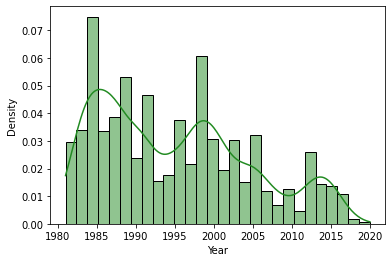

In [19]:
sns.histplot(data= dataset , x='Year',kde=True,stat='density',color='forestgreen')

In [60]:
m_year = dataset[ 'Year'] < 1983
m_year.sum()

377

In [210]:
m_cost = dataset[ 'Estimated Cost'] > 50000
dataset = dataset.loc[m_cost,:]
m_cost.sum()

8841

In [54]:
dataset.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Name',
       'Street Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Number of Proposed Stories',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Proposed Use', 'Proposed Units', 'Plansets',
       'Proposed Construction Type', 'Proposed Construction Type Description',
       'Site Permit', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location',
       'Record ID', 'address', 'lat', 'lon', 'Duration', 'Duration_b',
       'Process_time_days', 'Duration_construction_days', 'Year',
       'Estimated Cost_log10', 'Est_Cost_Infl', 'Rev_Cost_Inf',
       'Rev_Cost_Infl'],
      dtype='object')

In [41]:
cols = [#'Permit Type', 'Current Status',
        'Duration_construction_days', 'Year',
        'Estimated Cost', 'Revised Cost',
        'Est_Cost_Infl', 'Rev_Cost_Infl',
        'Neighborhoods - Analysis Boundaries', 'Zipcode',
        'Number of Proposed Stories',
       #'Existing Use', 'Existing Units','Number of Existing Stories',
        'Proposed Use', 'Proposed Units',
       # 'Existing Construction Type','Existing Construction Type Description',
        'Proposed Construction Type','Proposed Construction Type Description',
        'Plansets'
       ]
dataset[cols].shape


(9201, 14)

In [49]:
"""
newdf=dataset[cols].sample(1000)#frac=0.01)#0.15)


fig, axes = plt.subplots(nrows = 10, ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 40)

for ax, col in zip(axes, newdf.columns):
    sns.histplot(data=newdf,y=col,kde=True,ax=ax,stat='density',color='forestgreen')
    #if 'cost' in col.lower():
    #  sns.histplot(data=newdf,y=col,kde=True,ax=ax,stat='density',color='forestgreen',log_scale=True)
    #ax.set_title(col)
    #print(col)
#fig.savefig('drive/MyDrive/colab/data_exploration_.png',dpi=800)
#fig.close()
"""


"\nnewdf=dataset[cols].sample(1000)#frac=0.01)#0.15)\n\n\nfig, axes = plt.subplots(nrows = 10, ncols = 2)    # axes is 2d array (3x3)\naxes = axes.flatten()         # Convert axes to 1d array of length 9\nfig.set_size_inches(20, 40)\n\nfor ax, col in zip(axes, newdf.columns):\n    sns.histplot(data=newdf,y=col,kde=True,ax=ax,stat='density',color='forestgreen')\n    #if 'cost' in col.lower():\n    #  sns.histplot(data=newdf,y=col,kde=True,ax=ax,stat='density',color='forestgreen',log_scale=True)\n    #ax.set_title(col)\n    #print(col)\n#fig.savefig('drive/MyDrive/colab/data_exploration_.png',dpi=800)\n#fig.close()\n"

In [56]:
features = ['Number of Proposed Stories', 'Duration_construction_days',
             'Plansets','Permit Type', 'Proposed Construction Type',
             'Neighborhoods - Analysis Boundaries','Year']

for col in features [2:] :
  if 'days' not in col.lower():
    print(dataset[col].value_counts())

2.0    8054
4.0    1008
8.0      52
5.0      26
0.0      19
6.0      17
3.0      14
7.0       6
1.0       4
9.0       1
Name: Plansets, dtype: int64
2    8185
1    1016
Name: Permit Type, dtype: int64
5     7980
1      591
3      207
2      200
99     174
4       49
Name: Proposed Construction Type, dtype: int64
Bayview Hunters Point             1475
Other                             1061
Mission                            483
Potrero Hill                       450
Outer Richmond                     419
South of Market                    316
Sunset/Parkside                    312
Portola                            308
Bernal Heights                     288
Visitacion Valley                  281
West of Twin Peaks                 269
Oceanview/Merced/Ingleside         267
Noe Valley                         266
Castro/Upper Market                241
Inner Sunset                       229
Excelsior                          226
Outer Mission                      219
Hayes Valley           

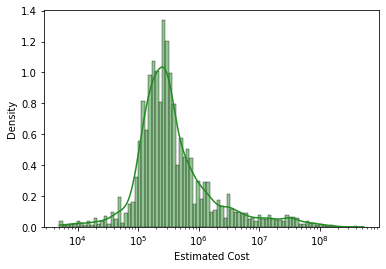

In [43]:
#histogram
sns.histplot(data= dataset , x='Estimated Cost',kde=True,stat='density',color='forestgreen',log_scale=True)

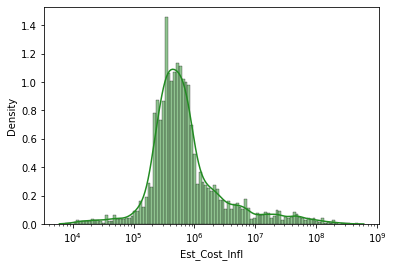

In [44]:
#histogram
sns.histplot(data= dataset , x='Est_Cost_Infl',kde=True,stat='density',color='forestgreen',log_scale=True)

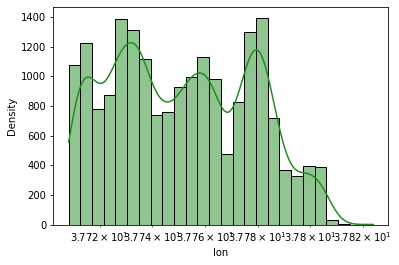

In [98]:
sns.histplot(data= dataset , x='lon',kde=True,stat='density',color='forestgreen',log_scale=True)

***Let's explore heatmap***

In [211]:
newdf = dataset[cols]

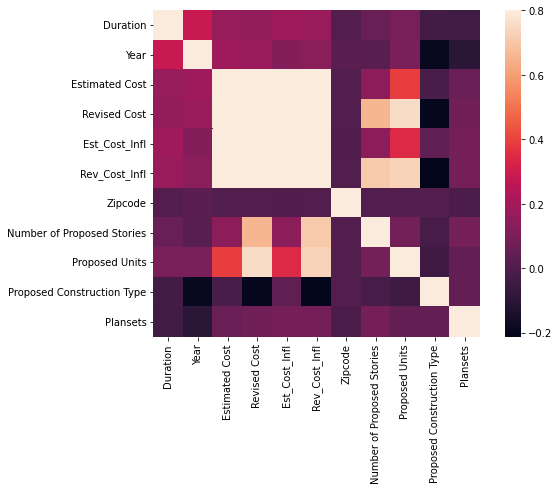

In [46]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(newdf.corr(), vmax=.8, square=True)
#fig.savefig('drive/MyDrive/colab/data_heatmap.jpg',dpi=400)

**Observations of HeatMap**



*   List item
*   List item



**In summary **

we can conclude that 



*   List item
*   List item



#MACHINE LEARNING



In [212]:
#kaggle ref. https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard


#libraries 

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler,OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_error,mean_squared_log_error,mean_absolute_error,explained_variance_score
import xgboost as xgb
import lightgbm as lgb

In [213]:
dataset.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Name',
       'Street Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Number of Proposed Stories',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Proposed Use', 'Proposed Units', 'Plansets',
       'Proposed Construction Type', 'Proposed Construction Type Description',
       'Site Permit', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location',
       'Record ID', 'address', 'lat', 'lon', 'Duration', 'Duration_b',
       'Process_time_days', 'Duration_construction_days', 'Year',
       'Estimated Cost_log10', 'Est_Cost_Infl', 'Rev_Cost_Inf',
       'Rev_Cost_Infl', 'lat_lon'],
      dtype='object')

In [214]:
dataset["Estimated Cost"].isna().sum()

0

In [215]:
dataset['lat_lon']=dataset['lat']*dataset['lon']

In [216]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = [
    "Permit Type",
    "Number of Proposed Stories", 
    "Plansets", 
    "Proposed Construction Type", 
    "Neighborhoods - Analysis Boundaries", 
    #"Zipcode",
    'lat_lon',
    #'lon',
    "Year",
    "Duration_construction_days"
]

target_variable = "Est_Cost_Infl"#"Estimated Cost_log10"#"Estimated Cost"

X = dataset.loc[:,features_list]
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())


Separating labels from features...
...Done.

Y : 
0    4.973752e+05
1    9.398079e+05
2    1.091235e+08
3    1.091235e+08
4    1.091235e+08
Name: Est_Cost_Infl, dtype: float64

X :
   Permit Type  Number of Proposed Stories  Plansets  \
0            2                         4.0       2.0   
1            2                         3.0       2.0   
2            1                        25.0       4.0   
3            1                        25.0       4.0   
4            1                        25.0       4.0   

   Proposed Construction Type Neighborhoods - Analysis Boundaries  \
0                           5                 Castro/Upper Market   
1                           5                        Inner Sunset   
2                           1                          Tenderloin   
3                           1                          Tenderloin   
4                           1                          Tenderloin   

       lat_lon  Year  Duration_construction_days  
0 -4623.268159  

In [217]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Permit Type', 'Number of Proposed Stories', 'Plansets', 'Proposed Construction Type', 'lat_lon', 'Year', 'Duration_construction_days']
Found categorical features  ['Neighborhoods - Analysis Boundaries']


In [218]:
#Manually selecting type of features
numeric_features=['Number of Proposed Stories', 'Duration_construction_days','Plansets','Year','lat_lon']
categorical_features=['Permit Type', 'Proposed Construction Type', 'Neighborhoods - Analysis Boundaries',] 

In [219]:
X.isna().sum()/X.shape[0]

Permit Type                            0.000000
Number of Proposed Stories             0.015835
Plansets                               0.000000
Proposed Construction Type             0.000000
Neighborhoods - Analysis Boundaries    0.000000
lat_lon                                0.000000
Year                                   0.000000
Duration_construction_days             0.000000
dtype: float64

In [220]:
X['Number of Proposed Stories'].describe()

count    8701.000000
mean        3.699632
std        14.657238
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max       920.000000
Name: Number of Proposed Stories, dtype: float64

In [221]:
X.loc[X['Number of Proposed Stories'].isna(),:].head()

,Permit Type,Number of Proposed Stories,Plansets,Proposed Construction Type,Neighborhoods - Analysis Boundaries,lat_lon,Year,Duration_construction_days
6,2,NaN,2.0,99,Bernal Heights,-4619.172084,1982,363.0
7,2,NaN,2.0,99,Potrero Hill,-4620.678392,1981,705.0
13,2,NaN,0.0,99,Haight Ashbury,-4624.397350,1981,764.0
14,2,NaN,2.0,99,Outer Richmond,-4627.975908,1981,407.0
15,2,NaN,4.0,99,Inner Richmond,-4625.995625,1981,474.0


In [222]:
#Since we use Kfold, we don't divide data into train and test data set!
#for X_train and Y_train we use all dataset since we use K-fold
X_train = X
Y_train = Y 
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.0, random_state=0)#,stratify=Y)
print("...Done.")
print()

...Done.



In [223]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])

In [224]:
# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [225]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [226]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
#print(X.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

"""
# Preprocessings on test set 
# IT IS COMMENTED SINCE WE USE K FOLD 
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()
"""

Performing preprocessings on train set...
...Done.
   Permit Type  Number of Proposed Stories  Plansets  \
0            2                         4.0       2.0   
1            2                         3.0       2.0   
2            1                        25.0       4.0   
3            1                        25.0       4.0   
4            1                        25.0       4.0   

   Proposed Construction Type Neighborhoods - Analysis Boundaries  \
0                           5                 Castro/Upper Market   
1                           5                        Inner Sunset   
2                           1                          Tenderloin   
3                           1                          Tenderloin   
4                           1                          Tenderloin   

       lat_lon  Year  Duration_construction_days  
0 -4623.268159  1991                       294.0  
1 -4625.233438  1987                       261.0  
2 -4625.316130  1984                      10

'\n# Preprocessings on test set \n# IT IS COMMENTED SINCE WE USE K FOLD \nprint("Performing preprocessings on test set...")\nprint(X_test.head()) \nX_test = preprocessor.transform(X_test) # Don\'t fit again !! The test set is used for validating decisions\n# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.\n# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.\nprint(\'...Done.\')\nprint(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore\nprint()\n'

In [227]:
np.isnan(Y_train).sum()

0

#***---CROSS VALIDATION---***


We take the cross_val_score function of Sklearn. Then, we use the function Kfold where shuffle = True to allow a shuffle attribution as cross_val_score does not have this option.

In [228]:
#Y_train = np.log10(Y_train)

***Define Metrics***





*** Extrait of python-sklearn manuel***

ref. https://scikit-learn.org/stable/modules/model_evaluation.html


***R² score, the coefficient of determination***

The r2_score function computes the coefficient of determination, usually denoted as

.

It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

As such variance is dataset dependent,
may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected (average) value of y, disregarding the input features, would get an score of 0.0.

***Mean squared error***

The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.


**Mean squared logarithmic error**

The mean_squared_log_error function computes a risk metric corresponding to the expected value of the squared logarithmic (quadratic) error or loss.

This metric is best to use when targets having exponential growth, such as population counts, average sales of a commodity over a span of years etc. Note that this metric penalizes an under-predicted estimate greater than an over-predicted estimate.

**Mean absolute percentage error***

The mean_absolute_percentage_error (MAPE), also known as mean absolute percentage deviation (MAPD), is an evaluation metric for regression problems. The idea of this metric is to be sensitive to relative errors. It is for example not changed by a global scaling of the target variable.


***Explained variance score***

The best possible score is 1.0, lower values are worse.

Link to R² score, the coefficient of determination: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

The difference between the explained variance score and the R² score, the coefficient of determination is that when the explained variance score does not account for systematic offset in the prediction. For this reason, the R² score, the coefficient of determination should be preferred in general.

In the particular case where the true target is constant, the Explained Variance score is not finite: it is either NaN (perfect predictions) or -Inf (imperfect predictions). Such non-finite scores may prevent correct model optimization such as grid-search cross-validation to be performed correctly. For this reason the default behaviour of explained_variance_score is to replace them with 1.0 (perfect predictions) or 0.0 (imperfect predictions). You can set the force_finite parameter to False to prevent this fix from happening and fallback on the original Explained Variance score.



In [229]:
#Validation function
n_folds = 4



In [230]:
#R2

def R2_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=0).get_n_splits(X_train)
    R2= cross_val_score(model, X_train, Y_train, scoring="r2", cv = kf)
    return(R2)

In [231]:
#sqrt of negative mean squared error
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=0).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [232]:
#sqrt of negative mean squred log error
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=0).get_n_splits(X_train)
    rmsle= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_log_error", cv = kf))
    return(rmsle)

In [233]:
#Mean absolute percentage error*
def mape_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=0).get_n_splits(X_train)
    mape= -cross_val_score(model, X_train, Y_train, scoring="neg_mean_absolute_percentage_error", cv = kf)
    return(mape)

In [234]:
#explained_variance_score 
def evs_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=0).get_n_splits(X_train)
    evs= cross_val_score(model, X_train, Y_train, scoring="explained_variance", cv = kf)
    return(evs)


***Definiton of base models***

***Linear Regression :***
    

Not that we dont apply Robustscaler()! It can be useful to make data more robust on outliers in the future. We can use sklearn's Robustscaler() method on pipeline


In [235]:
regressor0= LinearRegression()

***LASSO Regression :***
    



In [236]:
lasso = Lasso(alpha =0.0005, random_state=0)
#make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

***Elastic Net Regression :***




In [237]:
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=0)
#make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

Kernel Ridge Regression :

In [238]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

***Gradient Boosting Regression :***


With huber loss, our model is more robust to outliers


In [239]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =0)

***XGBoost :***

In [240]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =0, nthread = -1)

**LightGBM - Gradient Boosting With LightGBM**

LightGBM is an algorithm developed by Microsoft in 2017. It has an advantage of changing the training algorithm that make the run time faster and likely result in a more effective model.

Ref. to the LightGBM algorithm paper:

    LightGBM: A Highly Efficient Gradient Boosting Decision Tree, 2017.
link : https://papers.nips.cc/paper/2017/hash/6449f44a102fde848669bdd9eb6b76fa-Abstract.html

In [241]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


#Base models scores

Let's see how these base models perform on the data by evaluating the cross-validation metrics


In [251]:
model = regressor0
print("\nLinear regressor model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))

score_2 = rmse_cv(model)
print("\nRoot mean squared error - mean : {:.0f}  |  std : {:.0f}\n".format(score_2.mean(), score_2.std()))

score_3 = rmsle_cv(model)
print("\nRMSLE -logarithmic error - mean : {:.4f}  |  std : {:.4f}\n".format(score_3.mean(), score_3.std()))

score_4 = mape_cv(model)
print("\nMean absolute percentage error - mean : {:.2f}  |  std : {:.2f}\n".format(score_4.mean(), score_4.std()))

score_5 = evs_cv(model)
print("\nExplained variance score - mean : {:.4f}  |  std : {:.4f}\n".format(score_5.mean(), score_5.std()))


Linear regressor model

R2 score - mean : 0.0798  |  std : 0.3058


Root mean squared error - mean : 16245903  |  std : 6054055


RMSLE -logarithmic error - mean : nan  |  std : nan


Mean absolute percentage error - mean : 5.97  |  std : 1.74


Explained variance score - mean : 0.0924  |  std : 0.3086



In [252]:
model = lasso

print("\nLasso model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))

score_2 = rmse_cv(model)
print("\nRoot mean squared error - mean : {:.0f}  |  std : {:.0f}\n".format(score_2.mean(), score_2.std()))

score_3 = rmsle_cv(model)
print("\nRMSLE -logarithmic error - mean : {:.4f}  |  std : {:.4f}\n".format(score_3.mean(), score_3.std()))

score_4 = mape_cv(model)
print("\nMean absolute percentage error - mean : {:.2f}  |  std : {:.2f}\n".format(score_4.mean(), score_4.std()))

score_5 = evs_cv(model)
print("\nExplained variance score - mean : {:.4f}  |  std : {:.4f}\n".format(score_5.mean(), score_5.std()))


Lasso model

R2 score - mean : 0.0798  |  std : 0.3058


Root mean squared error - mean : 16245903  |  std : 6054055


RMSLE -logarithmic error - mean : nan  |  std : nan


Mean absolute percentage error - mean : 5.97  |  std : 1.74


Explained variance score - mean : 0.0924  |  std : 0.3086



In [253]:
score_1

array([ 0.15247052, -0.43828016,  0.32620765,  0.27895324])

In [254]:
model = ENet
print("\nElastic Net regressor model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))

score_2 = rmse_cv(model)
print("\nRoot mean squared error - mean : {:.0f}  |  std : {:.0f}\n".format(score_2.mean(), score_2.std()))

score_3 = rmsle_cv(model)
print("\nRMSLE -logarithmic error - mean : {:.4f}  |  std : {:.4f}\n".format(score_3.mean(), score_3.std()))

score_4 = mape_cv(model)
print("\nMean absolute percentage error - mean : {:.2f}  |  std : {:.2f}\n".format(score_4.mean(), score_4.std()))

score_5 = evs_cv(model)
print("\nExplained variance score - mean : {:.4f}  |  std : {:.4f}\n".format(score_5.mean(), score_5.std()))



Elastic Net regressor model

R2 score - mean : 0.0812  |  std : 0.3049


Root mean squared error - mean : 16237450  |  std : 6057084


RMSLE -logarithmic error - mean : nan  |  std : nan


Mean absolute percentage error - mean : 5.96  |  std : 1.74


Explained variance score - mean : 0.0937  |  std : 0.3078



In [255]:
model = KRR
print("\nKernel Ridge model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))

score_2 = rmse_cv(model)
print("\nRoot mean squared error - mean : {:.0f}  |  std : {:.0f}\n".format(score_2.mean(), score_2.std()))

score_3 = rmsle_cv(model)
print("\nRMSLE -logarithmic error - mean : {:.4f}  |  std : {:.4f}\n".format(score_3.mean(), score_3.std()))

score_4 = mape_cv(model)
print("\nMean absolute percentage error - mean : {:.2f}  |  std : {:.2f}\n".format(score_4.mean(), score_4.std()))

score_5 = evs_cv(model)
print("\nExplained variance score - mean : {:.4f}  |  std : {:.4f}\n".format(score_5.mean(), score_5.std()))


Kernel Ridge model

R2 score - mean : -0.2016  |  std : 0.6120


Root mean squared error - mean : 18062548  |  std : 7322227


RMSLE -logarithmic error - mean : nan  |  std : nan


Mean absolute percentage error - mean : 5.75  |  std : 0.90


Explained variance score - mean : -0.1953  |  std : 0.6094



In [256]:
model = GBoost
print("\nGradient Boosting model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))

score_2 = rmse_cv(model)
print("\nRoot mean squared error - mean : {:.0f}  |  std : {:.0f}\n".format(score_2.mean(), score_2.std()))

score_3 = rmsle_cv(model)
print("\nRMSLE -logarithmic error - mean : {:.4f}  |  std : {:.4f}\n".format(score_3.mean(), score_3.std()))

score_4 = mape_cv(model)
print("\nMean absolute percentage error - mean : {:.2f}  |  std : {:.2f}\n".format(score_4.mean(), score_4.std()))

score_5 = evs_cv(model)
print("\nExplained variance score - mean : {:.4f}  |  std : {:.4f}\n".format(score_5.mean(), score_5.std()))



Gradient Boosting model

R2 score - mean : 0.3752  |  std : 0.0504


Root mean squared error - mean : 14129612  |  std : 5726277


RMSLE -logarithmic error - mean : nan  |  std : nan


Mean absolute percentage error - mean : 1.15  |  std : 0.30


Explained variance score - mean : 0.3781  |  std : 0.0519



In [257]:
model = model_xgb
print("\n XGBoost model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))

score_2 = rmse_cv(model)
print("\nRoot mean squared error - mean : {:.0f}  |  std : {:.0f}\n".format(score_2.mean(), score_2.std()))

score_3 = rmsle_cv(model)
print("\nRMSLE -logarithmic error - mean : {:.4f}  |  std : {:.4f}\n".format(score_3.mean(), score_3.std()))

score_4 = mape_cv(model)
print("\nMean absolute percentage error - mean : {:.2f}  |  std : {:.2f}\n".format(score_4.mean(), score_4.std()))

score_5 = evs_cv(model)
print("\nExplained variance score - mean : {:.4f}  |  std : {:.4f}\n".format(score_5.mean(), score_5.std()))


 XGBoost model

R2 score - mean : 0.2783  |  std : 0.4084


Root mean squared error - mean : 13467413  |  std : 4766966


RMSLE -logarithmic error - mean : nan  |  std : nan


Mean absolute percentage error - mean : 2.96  |  std : 0.79


Explained variance score - mean : 0.2791  |  std : 0.4085



In [258]:
model = model_lgb
print("\nLGBM model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))

score_2 = rmse_cv(model)
print("\nRoot mean squared error - mean : {:.0f}  |  std : {:.0f}\n".format(score_2.mean(), score_2.std()))

score_3 = rmsle_cv(model)
print("\nRMSLE -logarithmic error - mean : {:.4f}  |  std : {:.4f}\n".format(score_3.mean(), score_3.std()))

score_4 = mape_cv(model)
print("\nMean absolute percentage error - mean : {:.2f}  |  std : {:.2f}\n".format(score_4.mean(), score_4.std()))

score_5 = evs_cv(model)
print("\nExplained variance score - mean : {:.4f}  |  std : {:.4f}\n".format(score_5.mean(), score_5.std()))



LGBM model

R2 score - mean : 0.4158  |  std : 0.0900


Root mean squared error - mean : 13474831  |  std : 5376606


RMSLE -logarithmic error - mean : nan  |  std : nan


Mean absolute percentage error - mean : 3.29  |  std : 1.29


Explained variance score - mean : 0.4160  |  std : 0.0899



array([nan, nan, nan, nan])

Stopped here 11/08/22

***Add your observations and conclusions here***



*** SUMMARY ***

Metric 1 :

Metric 2 :




*** Conclusion : ***



Comment on your results

Which metric to use ?
